### K-means clustering is one of the frequently used clustering algorithms for business applications

#### Here are the steps used in the K-means algorithm:

1) Decide the value of K (number of clusters)

2) Choose K observations from the data that are likely to be in different clusters. there are many ways of choosing these initial K values, the easiest approach is to choose observations that are farthest from each other.

3) The K Observations selected in step 2 are the centroids of those clusters.

4) For remaining observations, find the cluster closest to the centroid. add the new observation to the cluster closest to the centroid. adjust the centroid after adding a new observation to the cluster.the closed centroid is chosen upon an appropriate distance measure.

5) repeat step 4 until all observations are assigned to a cluster.

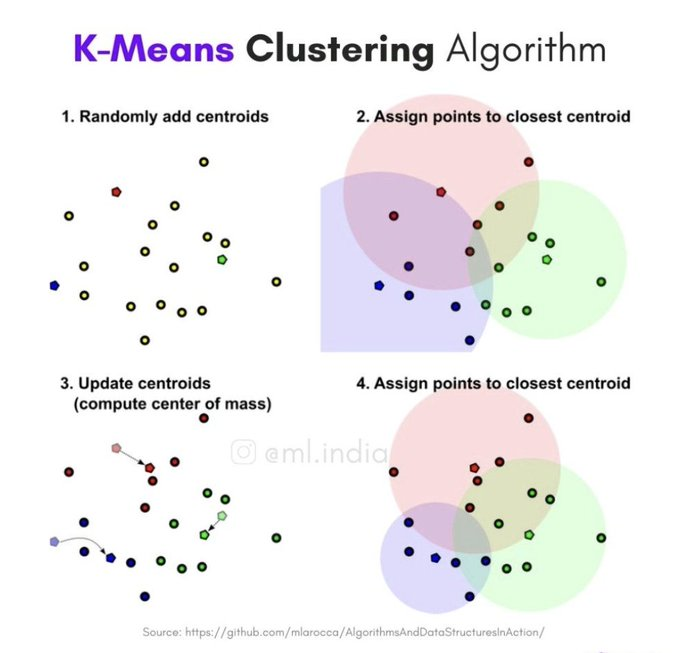

In [21]:
Image('FSzJ3oKUYAAP3Ut.jpg')

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [23]:
df = pd.read_csv("income Data.csv")
df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

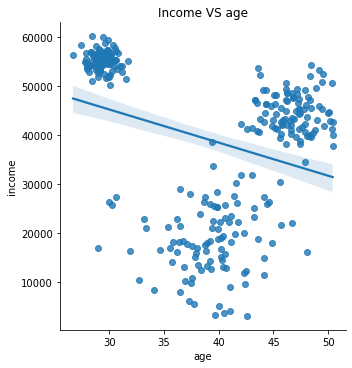

In [24]:
# visualize the data using lmplot
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', data=df, fit_reg=True, size=5)
plt.title("Income VS age")
plt.show()

In [25]:
%%time
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=3, n_init=15, random_state=42)
clusters.fit(df)

CPU times: total: 125 ms
Wall time: 91.8 ms


c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=42)

In [26]:
df['clusterid'] = clusters.labels_
df.head()

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

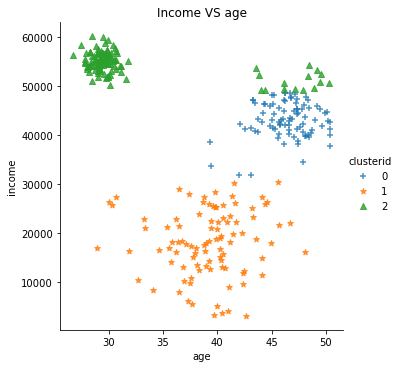

In [27]:
# plot the clusters 
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', hue='clusterid', markers=['+','*','^'], data=df, fit_reg=False, size=5)
plt.title("Income VS age")
plt.show()

In [28]:
# we have problme high scaled incom data so we need to normlize the data
new_df = pd.DataFrame({"income":np.array(df['income']),
                         "age": np.array(df['age'])
                         })
def scaling(df):
    lis = []
    for col in df.columns:
        cols = df[col].map(lambda x: (x - df[col].mean())/df[col].std())
        lis.append(cols)
        scaled_df = pd.concat([s for s in lis], axis=1)
    return scaled_df

In [29]:
scale_df = scaling(new_df)

In [30]:
# apply the clsutering again
clusters_new = KMeans(3 , random_state=42, n_init=15)
clusters_new.fit(scale_df)
scale_df['clusterid_n'] = clusters_new.labels_
clusters_new

c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, n_init=15, random_state=42)

In [31]:
scale_df.head()

,income,age,clusterid_n
0,0.097023,1.367878,0
1,0.904516,-1.376828,1
2,0.513193,1.102047,0
3,-1.269503,0.238096,2
4,-1.325406,-0.353378,2


c:\Users\Avi\.conda\envs\mlcollab\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

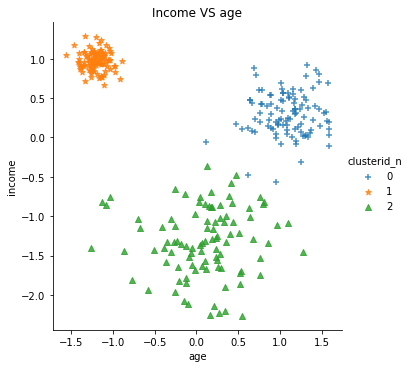

In [32]:
# visualise the dataframe
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', hue='clusterid_n', markers=['+','*','^'], data=scale_df, fit_reg=False, size=5)
plt.title("Income VS age")
plt.show()

In [33]:
clusters_new.cluster_centers_

array([[ 0.29633358,  1.085723  ],
       [ 0.97309096, -1.20616427],
       [-1.31785005,  0.0905872 ]])

In [34]:
# using groupby method to know what is the meaning of clusters
df.groupby("clusterid")['age','income'].agg(['mean', 'std']).reset_index()

C:\Users\Avi\AppData\Local\Temp\ipykernel_20412\1529173468.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("clusterid")['age','income'].agg(['mean', 'std']).reset_index()


clusterid        age                  income             
                  mean       std          mean          std
0         0  46.419101  2.289620  43053.932584  3613.769632
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  31.700435  6.122122  54675.652174  2362.224320

## Using DBSCAN algorithm

Density-Based spatial clustering of applications with noise. finds core samples of high density and expands clusters from that sample

It is good for data that contains highly dense clusters

In [40]:
# Using DBSCAN algorithm on the dataset
from sklearn.cluster import DBSCAN
df_db = scale_df.drop("clusterid_n", axis=1)

In [64]:
db = DBSCAN(eps=0.2, min_samples=10)
db.fit(df_db)
labels = db.labels_
df_db['db_labels'] = labels
df_db.head()

,income,age,db_labels
0,0.097023,1.367878,0
1,0.904516,-1.376828,1
2,0.513193,1.102047,0
3,-1.269503,0.238096,2
4,-1.325406,-0.353378,-1


<Figure size 432x432 with 0 Axes>

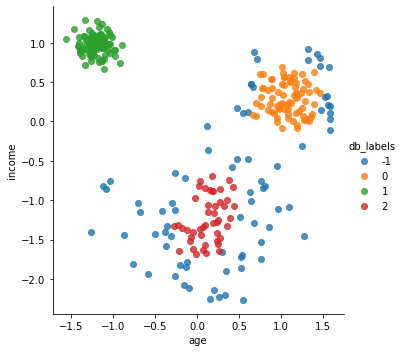

In [55]:
# plot the dbscan clusters
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='income', fit_reg=False, hue='db_labels',data=df_db)
plt.show()

In [108]:
X = df_db.drop("db_labels", axis=1)
eps_list = [0.1,0.2,0.3,0.4,0.5]
sample_list = [x for x in range(1,11)]

lables = []
tuple_pairs = []

for i in eps_list:
    for j in sample_list:
        db1 = DBSCAN(eps=i, min_samples=j)
        db1.fit(X)
        labels = db1.labels_
        tupl = tuple([i,j])
        lables.append(labels)
        tuple_pairs.append(tupl)

lables_df1 = pd.concat([pd.Series(x) for x in lables], axis=1)
new_df1 = pd.concat([X,lables_df1], axis=1)
new_df1.shape

(300, 52)

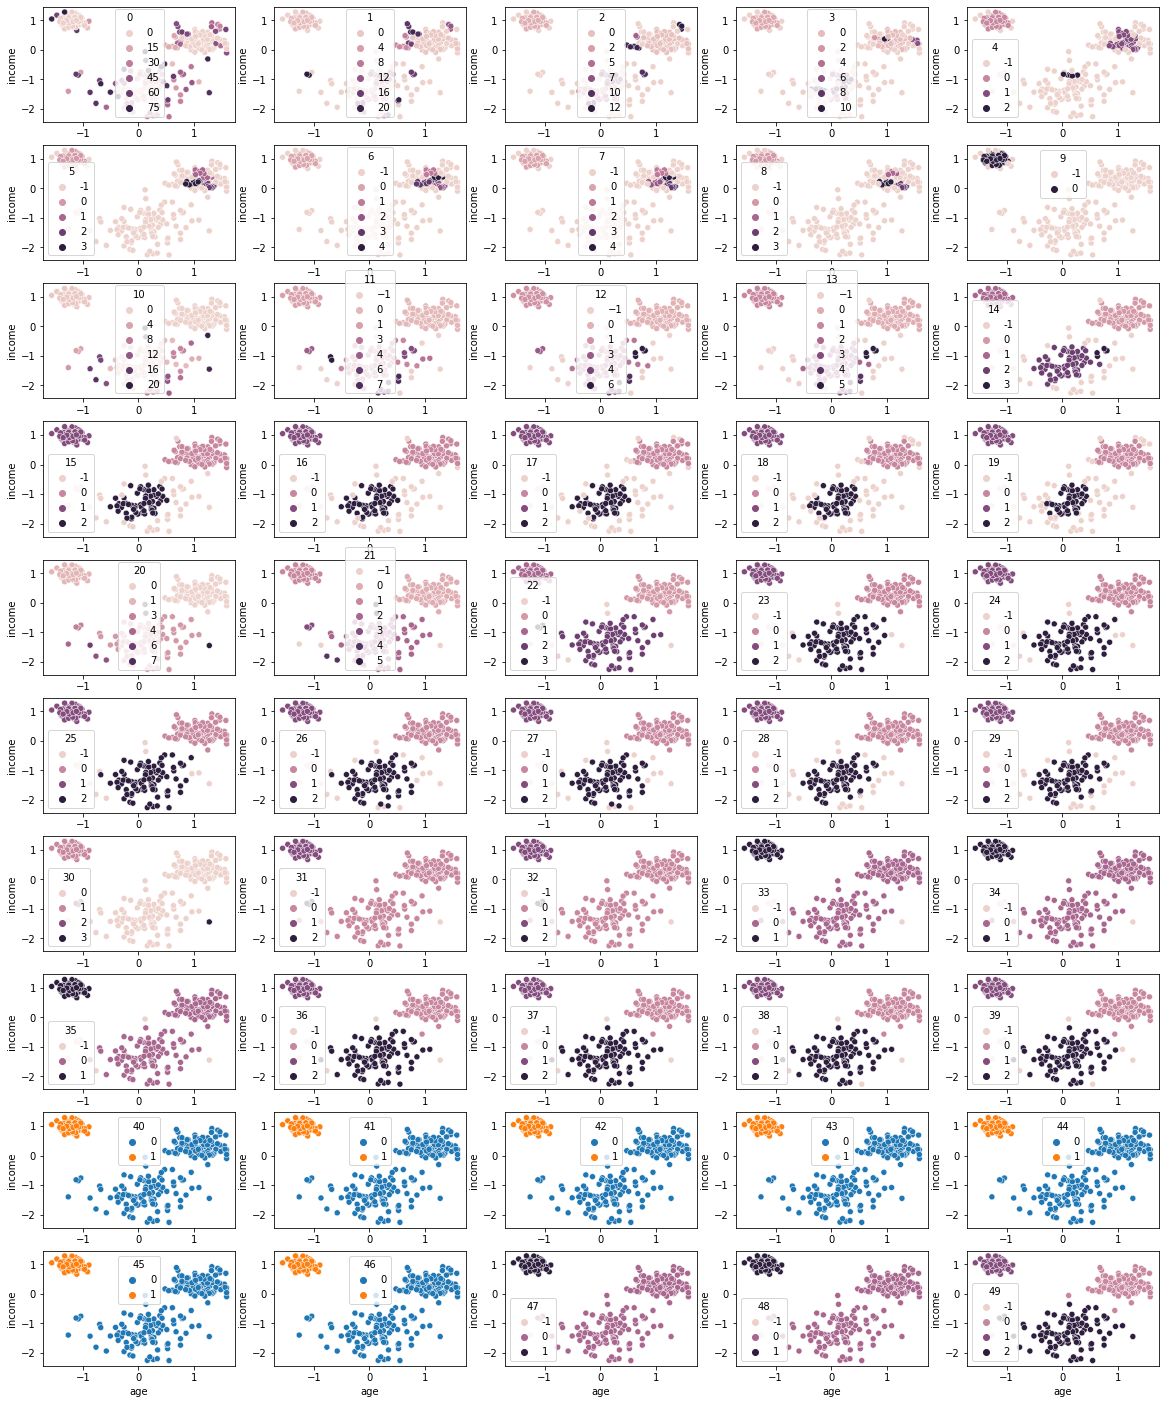

In [107]:
# plot all 50 clusters
plt.figure(figsize=(20,25))
for i in range(0,50):
        plt.subplot(10,5,i+1)
        sns.scatterplot(x='age', y='income', hue=i, data=new_df1)
plt.show()

### Conclusions:

1) K-means work based on euclidean distance metric and create clusters by iterating over data with number of clusters assigned to the algorithm.

2) While, DBSCAN works on dense samples to create clusters so it is used for highly densed data not for features with high variations.